In [25]:
import arftools
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
    

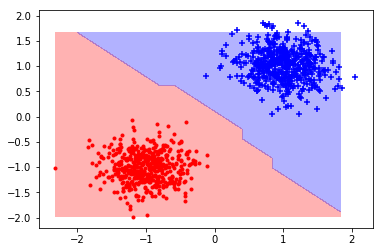

In [26]:
from sklearn.svm import SVC
svm = SVC(probability=True)
# donnes jeux

datax,datay = arftools.gen_arti()
svm.fit(datax,datay)

arftools.plot_frontiere(datax,svm.predict)
arftools.plot_data(datax,datay)
plt.show()


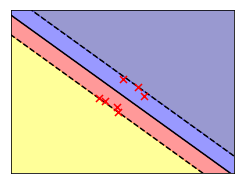

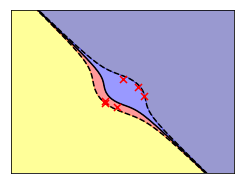

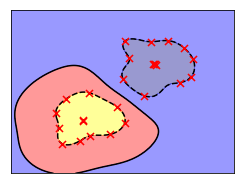

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X,Y = arftools.gen_arti()

def plot_SVM(X,Y,kernels = ['linear'], C=0):
    fignum = 1
    for kernel in kernels:
        """
        Intuitively, the gamma parameter defines how far the influence of a single training example reaches, 
        with low values meaning ‘far’ and high values meaning ‘close’. 
        The gamma parameters can be seen as the inverse of the radius of influence of samples selected by 
        the model as support vectors.
        """
        if C == 0:
            clf = svm.SVC(kernel=kernel, gamma=2)
        else:
            clf = svm.SVC(kernel=kernel, gamma=2, C=C)
        clf.fit(X, Y)

        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],  s=50,
                    facecolors='red', marker='x', zorder=10, )
        #plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

        plt.axis('tight')
        #arftools.plot_data(X,Y)
        xmax, xmin, ymax, ymin = np.max(X[:,0]),  np.min(X[:,0]), np.max(X[:,1]), np.min(X[:,1])

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        #arftools.plot_frontiere(X,clf.predict)
        #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        plt.contourf(XX,YY,Z,colors=['yellow','red','blue','darkblue'],levels=[-1000,-1.,0,1.,1000],alpha=0.4)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
    plt.show()
    
plot_SVM(X,Y,kernels = ['linear', 'poly', 'rbf'])

In [79]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.show()
    
def char(character,datax,datay):
    return datax[datay==character],datay[datay==character]

fn_usps_train = 'USPS_train.txt'
fn_usps_test = 'USPS_test.txt'

trainx,trainy = load_usps(fn_usps_train)
testx,testy = load_usps(fn_usps_test)

clf = svm.SVC(kernel=kernel, gamma=2)

def Score_Multi_class_train(trainx,trainy,testx,testy,clf):
    classes = 10
    scores = np.zeros((classes,classes))
    for i in range(classes):
        for j in range(classes):
            datax = None
            datay = None
            if not i==j:
                ch0x,ch0y = char(i,trainx,trainy)
                ch1x,ch1y = char(j,trainx,trainy) 
                datax = np.vstack((ch0x,ch1x))
                datay = np.hstack((np.zeros(ch1y.shape)-1,np.zeros(ch0y.shape)+1))
                
                testch0x,testch0y = char(i,testx,testy)
                testch1x,testch1y = char(j,testx,testy)

                clf.fit(datax,datay)
                scores[i,j] = clf.score(datax,datay)
                y_scores = clf.fit(X_train, y_train).decision_function(datax)
    return scores

print Score_Multi_class_train(trainx,trainy,clf)

[[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]]
